In [1]:
import torch
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

In [4]:
!unzip "/content/drive/My Drive/Colab Notebooks/kurs_1.zip"
# !unzip /drive/My_Drive/Colab Notebooks/kurs_1.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: kurs_1/train/09_c/frame_03_09_0013.png  
  inflating: kurs_1/train/09_c/frame_03_09_0014.png  
  inflating: kurs_1/train/09_c/frame_03_09_0015.png  
  inflating: kurs_1/train/09_c/frame_03_09_0016.png  
  inflating: kurs_1/train/09_c/frame_03_09_0017.png  
  inflating: kurs_1/train/09_c/frame_03_09_0018.png  
  inflating: kurs_1/train/09_c/frame_03_09_0019.png  
  inflating: kurs_1/train/09_c/frame_03_09_0020.png  
  inflating: kurs_1/train/09_c/frame_03_09_0021.png  
  inflating: kurs_1/train/09_c/frame_03_09_0022.png  
  inflating: kurs_1/train/09_c/frame_03_09_0023.png  
  inflating: kurs_1/train/09_c/frame_03_09_0024.png  
  inflating: kurs_1/train/09_c/frame_03_09_0025.png  
  inflating: kurs_1/train/09_c/frame_03_09_0026.png  
  inflating: kurs_1/train/09_c/frame_03_09_0027.png  
  inflating: kurs_1/train/09_c/frame_03_09_0028.png  
  inflating: kurs_1/train/09_c/frame_03_09_0029.png  
  inflating: k

In [5]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.models as models

In [6]:
dataset = ImageFolder(root="./kurs_1/train/", transform=transforms.Compose([transforms.Resize((240, 240)), transforms.RandAugment(), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
val_dset = ImageFolder(root="./kurs_1/valid/", transform=transforms.Compose([transforms.Resize((240, 240)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

In [7]:
dataset[20]

(tensor([[[-0.9529, -0.9529, -0.9529,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9529, -0.9529, -0.9529,  ..., -0.9608, -0.9686, -0.9686],
          [-0.9529, -0.9529, -0.9529,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9608, -0.9608,  ..., -0.9529, -0.9451, -0.9529],
          [-0.9608, -0.9608, -0.9686,  ..., -0.9608, -0.9529, -0.9529],
          [-0.9608, -0.9608, -0.9608,  ..., -0.7647, -0.7647, -0.8745]],
 
         [[-0.9529, -0.9529, -0.9529,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9529, -0.9529, -0.9529,  ..., -0.9608, -0.9686, -0.9686],
          [-0.9529, -0.9529, -0.9529,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.9686, -0.9608, -0.9608,  ..., -0.9529, -0.9451, -0.9529],
          [-0.9608, -0.9608, -0.9686,  ..., -0.9608, -0.9529, -0.9529],
          [-0.9608, -0.9608, -0.9608,  ..., -0.7647, -0.7647, -0.8745]],
 
         [[-0.9529, -0.9529, -0.9529,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9529, -0.9529,

In [8]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)
valid_loader = DataLoader(val_dset, batch_size=16, num_workers=2)

In [9]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device
# device = 'cpu'

'cuda:0'

In [10]:
model = models.resnet50(weights=None)

In [11]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
model.fc = nn.Linear(2048, 10, bias=True)

In [13]:
model = model.to(device)

In [14]:
from torch.optim import Adam

In [15]:
optim = Adam(model.parameters(), lr=0.001)

In [16]:
clas_loss = nn.CrossEntropyLoss()

In [17]:
def class_train(model, trainloader, val_loader, criterion, optimizer, epochs, device, calc_metr):
  epoch_lst = []
  val_lst = []
  train_lst = []
  train_loss_lst, val_loss_lst = [], []
  for epoch in range(epochs):
    model.train()
    train_acc, val_acc = 0, 0
    train_loss, val_loss = 0, 0
    for i, (x, target) in enumerate(trainloader):
      optimizer.zero_grad()
      x, target = x.to(device), target.to(device)
      output = model(x)
      loss = criterion(output, target)
      if i % 200 == 0:
        print(f"Acc on iter {i}/{len(trainloader)}: {calc_metr(output, target):.3f}")
      train_loss += loss
      train_acc += calc_metr(output, target)
      loss.backward()
      optimizer.step()
    print(f"acc train on {epoch + 1}: {(train_acc.item() / len(trainloader)):.4f}")
    print("Validation:")
    model.eval()
    with torch.no_grad():
      for i, (x_val, val_tar) in enumerate(val_loader):
        x_val, val_tar = x_val.to(device), val_tar.to(device)
        output = model(x_val)
        loss = criterion(output, val_tar)
        val_loss += loss
        val_acc += calc_metr(output, val_tar)
      print(f"acc val on {epoch + 1}: {(val_acc.item() / len(val_loader)):.4f}\n")
    epoch_lst.append(epoch + 1)
    train_lst.append(train_acc.item() / len(trainloader))
    val_lst.append(val_acc.item() / len(val_loader))
    train_loss_lst.append(train_loss.item() / len(trainloader))
    val_loss_lst.append(val_loss.item() / len(val_loader))
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.title("Accuracy")
  plt.plot(epoch_lst, train_lst, label="train")
  plt.plot(epoch_lst, val_lst, label="valid")
  plt.xlabel("Epochs")
  plt.ylabel("accuracy")
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.title("Loss")
  plt.plot(epoch_lst, train_loss_lst, label="train")
  plt.plot(epoch_lst, val_loss_lst, label="valid")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()
  plt.show()

In [18]:
def calc_acc(output, target):
  output = torch.argmax(output, dim=1)
  return torch.sum(output==target) / len(output)

Acc on iter 0/563: 0.062
Acc on iter 200/563: 0.812
Acc on iter 400/563: 0.844
acc train on 1: 0.7078
Validation:
acc val on 1: 0.2100

Acc on iter 0/563: 0.844
Acc on iter 200/563: 0.875
Acc on iter 400/563: 0.938
acc train on 2: 0.8538
Validation:
acc val on 2: 0.6185

Acc on iter 0/563: 0.906
Acc on iter 200/563: 0.812
Acc on iter 400/563: 0.812
acc train on 3: 0.8623
Validation:
acc val on 3: 0.8705

Acc on iter 0/563: 0.938
Acc on iter 200/563: 0.938
Acc on iter 400/563: 0.906
acc train on 4: 0.8743
Validation:
acc val on 4: 0.9490

Acc on iter 0/563: 0.938
Acc on iter 200/563: 0.906
Acc on iter 400/563: 0.906
acc train on 5: 0.8776
Validation:
acc val on 5: 0.9390



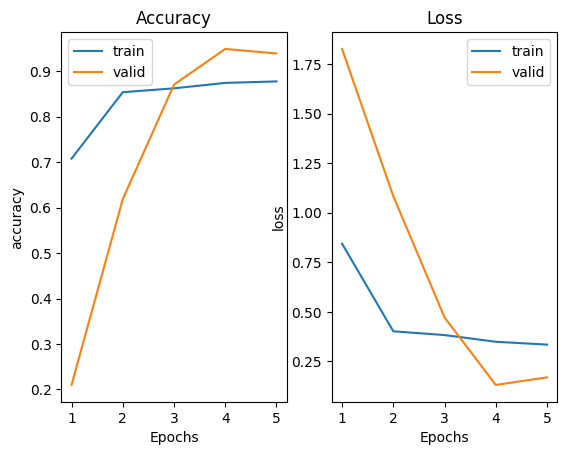

In [19]:
class_train(model, trainloader=train_loader, val_loader=valid_loader, criterion=clas_loss, optimizer=optim, epochs=5, device=device, calc_metr=calc_acc)

In [27]:
from PIL import Image

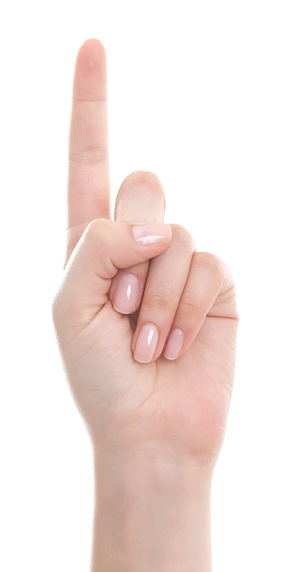

In [44]:
test_img = Image.open("/content/drive/My Drive/Colab Notebooks/test_image.jpg")
test_img

In [45]:
convert_img = transforms.Compose([transforms.Resize((240, 240)), transforms.ToTensor()])
test_img = convert_img(test_img)
test_img.shape

torch.Size([3, 240, 240])

In [46]:
test_img = test_img.unsqueeze(0)
test_img.shape

torch.Size([1, 3, 240, 240])

In [48]:
model.eval()
with torch.no_grad():
  test_img = test_img.to(device)
  output = model(test_img)
  output = torch.argmax(output, dim=1)

print(output)

tensor([9], device='cuda:0')
